In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

In [5]:
file_path = "../data/heart.csv"

data = pd.read_csv(file_path)

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
x = data.iloc[:, :13].values
y = data.iloc[:, 13].values

In [11]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [12]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=100)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn.predict(x_test)

In [25]:
print(y_pred)
print(y_test)

[1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0]
[1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0]


In [26]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


In [27]:
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)
print("ROC AUC Score: ", roc_auc)


Accuracy:  0.6557377049180327
Confusion Matrix: 
 [[15 18]
 [ 3 25]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.58      0.89      0.70        28

    accuracy                           0.66        61
   macro avg       0.71      0.67      0.65        61
weighted avg       0.72      0.66      0.64        61

ROC AUC Score:  0.6737012987012987


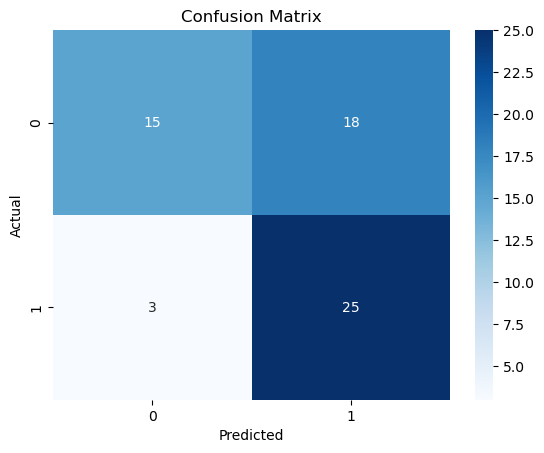

In [28]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [40]:
y_pred = knn.predict(x_test_scaled)

In [ ]:
print(y_pred)

[1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0]
[1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0]


In [43]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [44]:
print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report)
print("ROC AUC Score: ", roc_auc)


Accuracy:  0.8524590163934426
Confusion Matrix: 
 [[28  5]
 [ 4 24]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.83      0.86      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC AUC Score:  0.8528138528138529


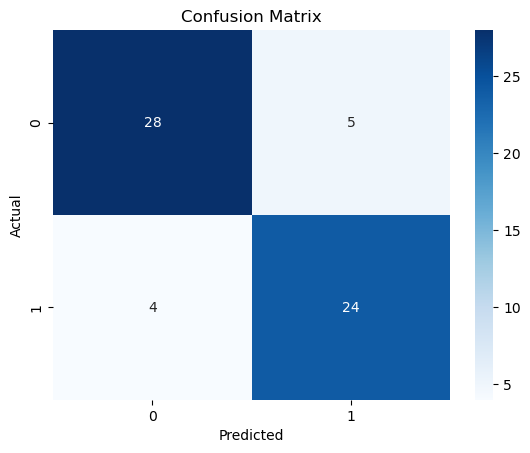

In [45]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

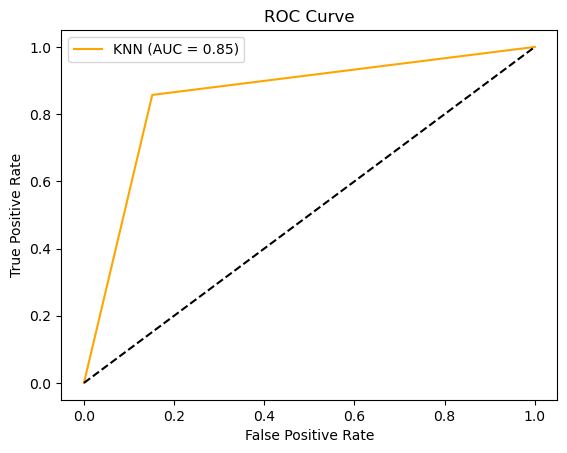

In [46]:
fpr, tpr , thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()